In [1]:
import pandas as pd
import numpy as np
%matplotlib notebook

import matplotlib.pyplot as plt 
import datetime
import matplotlib.dates as mdates

## COVID-19

Проект строит графики заражения по открытым данным, обновляя данные ежедневно из открытых источников. 

In [2]:
virus = (pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
                    .set_index('Country/Region').drop(columns=['Province/State','Lat','Long']).groupby(level=0).sum()
        )
# доп столбец с странами
virus['Country'] = virus.index.values

#найдем последнюю дату
first_data = '1/22/20'
last_data = list(virus)[-2]

In [3]:
# найдем страны с самым большим количеством заболевших на 16 апреля
count = virus.groupby('Country')[last_data].sum().sort_values(ascending = False).head(10)
# сред по индексам из стран большой двадцатки которые мы собрали в предыдущей строке
virus_big = virus.query('Country in @count.index')
pivot = virus_big.pivot_table(index = 'Country', values = ['4/2/20','4/9/20', '4/16/20'])
pivot['Country'] = pivot.index.values
pivot = pivot.reset_index(drop = True)
pivot.columns = ['3' , '1', '2', 'Country']
#print(pivot.T)
#count

In [4]:
def func(virus, what_country):
    ''' Функция для создания графика заражения по заданой стране'''
    # выбираем данные по стране и по дате и поворачивавем таблицу
    con= (virus.loc[(virus['Country'] == what_country)])
    con = con.loc[:, first_data : last_data].T
    con['data'] = con.index.values
    #показываем формат даты
    con['data'] = pd.to_datetime(con['data'], format = '%m/%d/%y')
    con.columns = ['kolichestvo' , 'data']
    con = con.reset_index(drop = True)
    #  начинаем строить график при заболевших больше 100 человек
    con = con.loc[con['kolichestvo'] >= 100]
    spis = con['kolichestvo']
    #создаем столбец который из нарастающего итога делает нам столбец по дням.
    con['dd'] = spis.diff()
    df = con.groupby(pd.Grouper(key='data', freq='W'))['dd'].sum()
    df.plot(label = what_country, legend = True)
    #con.plot(x = 'data', y = 'dd', label = what_country, legend = True)

Выбираем интересную страну / страны

<IPython.core.display.Javascript object>


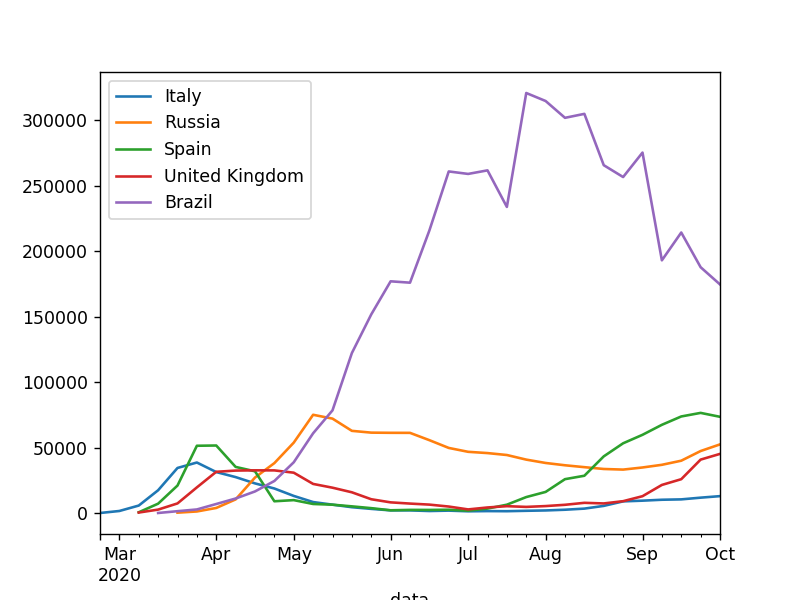

In [5]:
#func(virus, 'Ispani')
#func(virus, 'France')
func(virus, 'Italy')
#func(virus, 'Germany')
func(virus, 'Russia')
func(virus, 'Spain')
func(virus, 'United Kingdom')
func(virus, 'Brazil')             